#SYSC 5906:
## **Room Detection - V0.0**

---
Script to train and validate a Scikitlearn MLP model to peform room deteciton based on a processed version of the MIT Indoor Scenes dataset.

###Step 1: Access Drive
Mount the drive with the provided .zip file of code located in it

In [ ]:
#Enter the gdrive
from google.colab import drive
drive.mount('/gdrive',force_remount=True)

##Step 2: Setup
Import relevenat libraries, load original MIT dataset into colabs (without the images) and get the folders inside

In [ ]:
import sklearn as sk
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier


PROCESSED_FULLSET_DIRECTORY = '/gdrive/My Drive/Colab Notebooks/SYSC 5906/datasets/mit_indoors/processed/data_fullset/processedData.csv'
PROCESSED_SUBSET_DIRECTORY = '/gdrive/My Drive/Colab Notebooks/SYSC 5906/datasets/mit_indoors/processed/data_subset/processedData_subset.csv'
MODEL_DIRECTORY_MPL = '/gdrive/My Drive/Colab Notebooks/SYSC 5906/models/weights/room_classifier_mpl.sav'
MODEL_DIRECTORY_MPL_MOD = '/gdrive/My Drive/Colab Notebooks/SYSC 5906/models/weights/room_classifier_mpl_mod.sav'
MODEL_DIRECTORY_SVM = '/gdrive/My Drive/Colab Notebooks/SYSC 5906/models/weights/room_classifier_svm.sav'
MODEL_DIRECTORY_ADA_DT = '/gdrive/My Drive/Colab Notebooks/SYSC 5906/models/weights/room_classifier_ada_dt.sav'

In [ ]:
#Subset toggle
subsetTog = False

##Step 3: Training
Train all models, the models are trained on a portion
of the MIT data that is designated as the training dataset

In [ ]:
#Import the data from processed CSV
if subsetTog == True:
    trainingData = pd.read_csv(PROCESSED_SUBSET_DIRECTORY) #Train on subset of dataset
    print("Training on subset of dataset")
else:
    trainingData = pd.read_csv(PROCESSED_FULLSET_DIRECTORY) #Train on full dataset
    print("Training on full dataset")

#TEST:
#print(trainingData)
#print(trainingData.wall)

#Split the data into training and validation sets
training_set, validation_set = train_test_split(trainingData, train_size = 0.8, test_size = 0.2, random_state = 21)

#Splitting the predictors (input data) and target 
#variables (answers/things to classify) as X and Y
X_train = training_set.iloc[:,0:-1].values
Y_train = training_set.iloc[:,-1].values
X_val = validation_set.iloc[:,0:-1].values
Y_val = validation_set.iloc[:,-1].values

#TEST:
print(len(Y_train))
print(len(Y_val))

#Scale the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

#### Neural Net Methods ####
#Build the basic MPL classifer
classifier_mpl = MLPClassifier(hidden_layer_sizes=(150,100,50), 
                               max_iter=300, activation = 'relu', 
                               solver='adam', random_state=1)

#Build the modified MPL classifer
classifier_mpl_mod = MLPClassifier(hidden_layer_sizes=(150,100,50,10,10), 
                               max_iter=500, activation = 'relu', 
                               solver='adam', random_state=1)

#Build the MPL regressor
regressor_mpl = MLPRegressor(hidden_layer_sizes=(64,64,64),
                   activation="relu" ,random_state=1, 
                   max_iter=2000)

#### Linear Methods ####
decision_trees_adaboost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=300, learning_rate=1.5, algorithm="SAMME",)

#SVM_clf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo')
#SVM_clf = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo')
#SVM_clf = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo')
SVM_clf = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo')


Training on full dataset
2194
549


***Neural Net Methods***

Train Scikit-learn **basic MLP classifier** model:

In [ ]:
#Fitting the training data to the network
classifier_mpl.fit(X_train, Y_train)

MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300, random_state=1)

Train Scikit-learn **modified MLP classifier** model:

In [ ]:
#Fitting the training data to the network
classifier_mpl_mod.fit(X_train, Y_train)

MLPClassifier(hidden_layer_sizes=(150, 100, 50, 10, 10), max_iter=500,
              random_state=1)

Train Scikit-learn **modified MLP regressor** model:

In [ ]:
#Fitting the training data to the network
#regressor_mpl.fit(X_train, Y_train)

#TODO: UPDATE THIS BLOCK !!!!

***Linear Methods***

Train Scikit-learn **SVM** model:

In [ ]:
#Fitting the training data to the SVM classifier
SVM_clf.fit(X_train, Y_train)

SVC(C=1, decision_function_shape='ovo', kernel='sigmoid')

Train Scikit-learn **Adaboost Decision Tree** model:



In [ ]:
#Fitting the training data to the SGD classifier
decision_trees_adaboost.fit(X_train, Y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=1.5, n_estimators=300)

##Step 4: Validation
Validate the models, determines the accuracy of their predictions on
the validation dataset

***Neural Net Methods***

Validate the **basic MLP classifier** model:

In [ ]:
#Predicting y for X_val
Y_pred = classifier_mpl.predict(X_val)

#Mean accurarcy on training and test data
print("Score/accuracy on training data: %f" % classifier_mpl.score(X_train, Y_train))
print("Score/accuracy on validation data: %f" % classifier_mpl.score(X_val, Y_val))
print("Score/accuracy on validation data: %f" % classifier_mpl.score(X_val, Y_pred))

#Determines the accuracy based on the sklearn confusion matrix
#this is the measured as the total number of correct 
#predictions divided by the total number of predictions.

#Determine metrics
# 'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives.
# 'macro': Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
print("Accuracy on validation data: %f" % sk.metrics.accuracy_score(Y_val, Y_pred))
print("Balanced accuracy on validation data: %f" % sk.metrics.balanced_accuracy_score(Y_val, Y_pred))
print("Recall score on validation data: %f" % sk.metrics.recall_score(Y_val, Y_pred, average='macro', zero_division=0))
print("Precision score on validation data: %f" % sk.metrics.precision_score(Y_val, Y_pred, average='macro', zero_division=0))
print("F1 score on validation data: %f" % sk.metrics.f1_score(Y_val, Y_pred, average='macro'))

# report = sk.metrics.classification_report(Y_val, Y_pred)
# print(report)

Score/accuracy on training data: 1.000000
Score/accuracy on validation data: 0.860544
Score/accuracy on validation data: 1.000000
Accuracy on validation data: 0.860544
Balanced accuracy on validation data: 0.744416
Recall score on validation data: 0.744416
Precision score on validation data: 0.822125
F1 score on validation data: 0.769957


In [ ]:
#Setup confusion matrix figure
plt.rcParams['figure.figsize'] = (100,100)

#Plot the accuracy (confusion matrix)
ConfusionMatrixDisplay.from_predictions(Y_val,Y_pred)
plt.show()

Validate the **modified MLP classifier** model:

In [ ]:
#Predicting y for X_val
Y_pred = classifier_mpl_mod.predict(X_val)

#Mean accurarcy on training and test data
print("Score/accuracy on training data: %f" % classifier_mpl_mod.score(X_train, Y_train))
print("Score/accuracy on validation data: %f" % classifier_mpl_mod.score(X_val, Y_val))
print("Score/accuracy on validation data: %f" % classifier_mpl_mod.score(X_val, Y_pred))

#Determines the accuracy based on the sklearn confusion matrix
#this is the measured as the total number of correct 
#predictions divided by the total number of predictions.

#Determine metrics
# 'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives.
# 'macro': Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
print("Accuracy on validation data: %f" % sk.metrics.accuracy_score(Y_val, Y_pred))
print("Balanced accuracy on validation data: %f" % sk.metrics.balanced_accuracy_score(Y_val, Y_pred))
print("Recall score on validation data: %f" % sk.metrics.recall_score(Y_val, Y_pred, average='macro', zero_division=0))
print("Precision score on validation data: %f" % sk.metrics.precision_score(Y_val, Y_pred, average='macro', zero_division=0))
print("F1 score on validation data: %f" % sk.metrics.f1_score(Y_val, Y_pred, average='macro'))

NotFittedError: ignored

In [ ]:
#Setup confusion matrix figure
plt.rcParams['figure.figsize'] = (100,100)

#Plot the accuracy (confusion matrix)
ConfusionMatrixDisplay.from_predictions(Y_val,Y_pred)
plt.show()

Validate the **MLP regressor** model:

In [ ]:
#Predicting y for X_val
# Y_pred = regressor_mpl.predict(X_val)

# #Comparing the predictions against the actual observations in y_val
# confuse_matrix = confusion_matrix(Y_pred, Y_val)

# #Printing the accuracy
# accuracyResult = accuracy(confuse_matrix)
# print("Accuracy of MLP Regressor : ", accuracyResult)

#UPDATE THIS BLOCK !!!!!

***Linear Methods***

Validate the **SVM** model:

In [ ]:
#Predicting y for X_val
Y_pred = SVM_clf.predict(X_val)

#Mean accurarcy on training and test data
print("Score/accuracy on training data: %f" % SVM_clf.score(X_train, Y_train))
print("Score/accuracy on validation data: %f" % SVM_clf.score(X_val, Y_val))
print("Score/accuracy on validation data: %f" % SVM_clf.score(X_val, Y_pred))

#Determine other metrics
# 'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives.
# 'macro': Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
print("Accuracy on validation data: %f" % sk.metrics.accuracy_score(Y_val, Y_pred))
print("Balanced accuracy on validation data: %f" % sk.metrics.balanced_accuracy_score(Y_val, Y_pred))
print("Recall score on validation data: %f" % sk.metrics.recall_score(Y_val, Y_pred, average='macro', zero_division=0))
print("Precision score on validation data: %f" % sk.metrics.precision_score(Y_val, Y_pred, average='macro', zero_division=0))
print("F1 score on validation data: %f" % sk.metrics.f1_score(Y_val, Y_pred, average='macro'))

Score/accuracy on training data: 0.725160
Score/accuracy on validation data: 0.533698
Score/accuracy on validation data: 1.000000
Accuracy on validation data: 0.533698
Balanced accuracy on validation data: 0.300934
Recall score on validation data: 0.300934
Precision score on validation data: 0.522724
F1 score on validation data: 0.352488


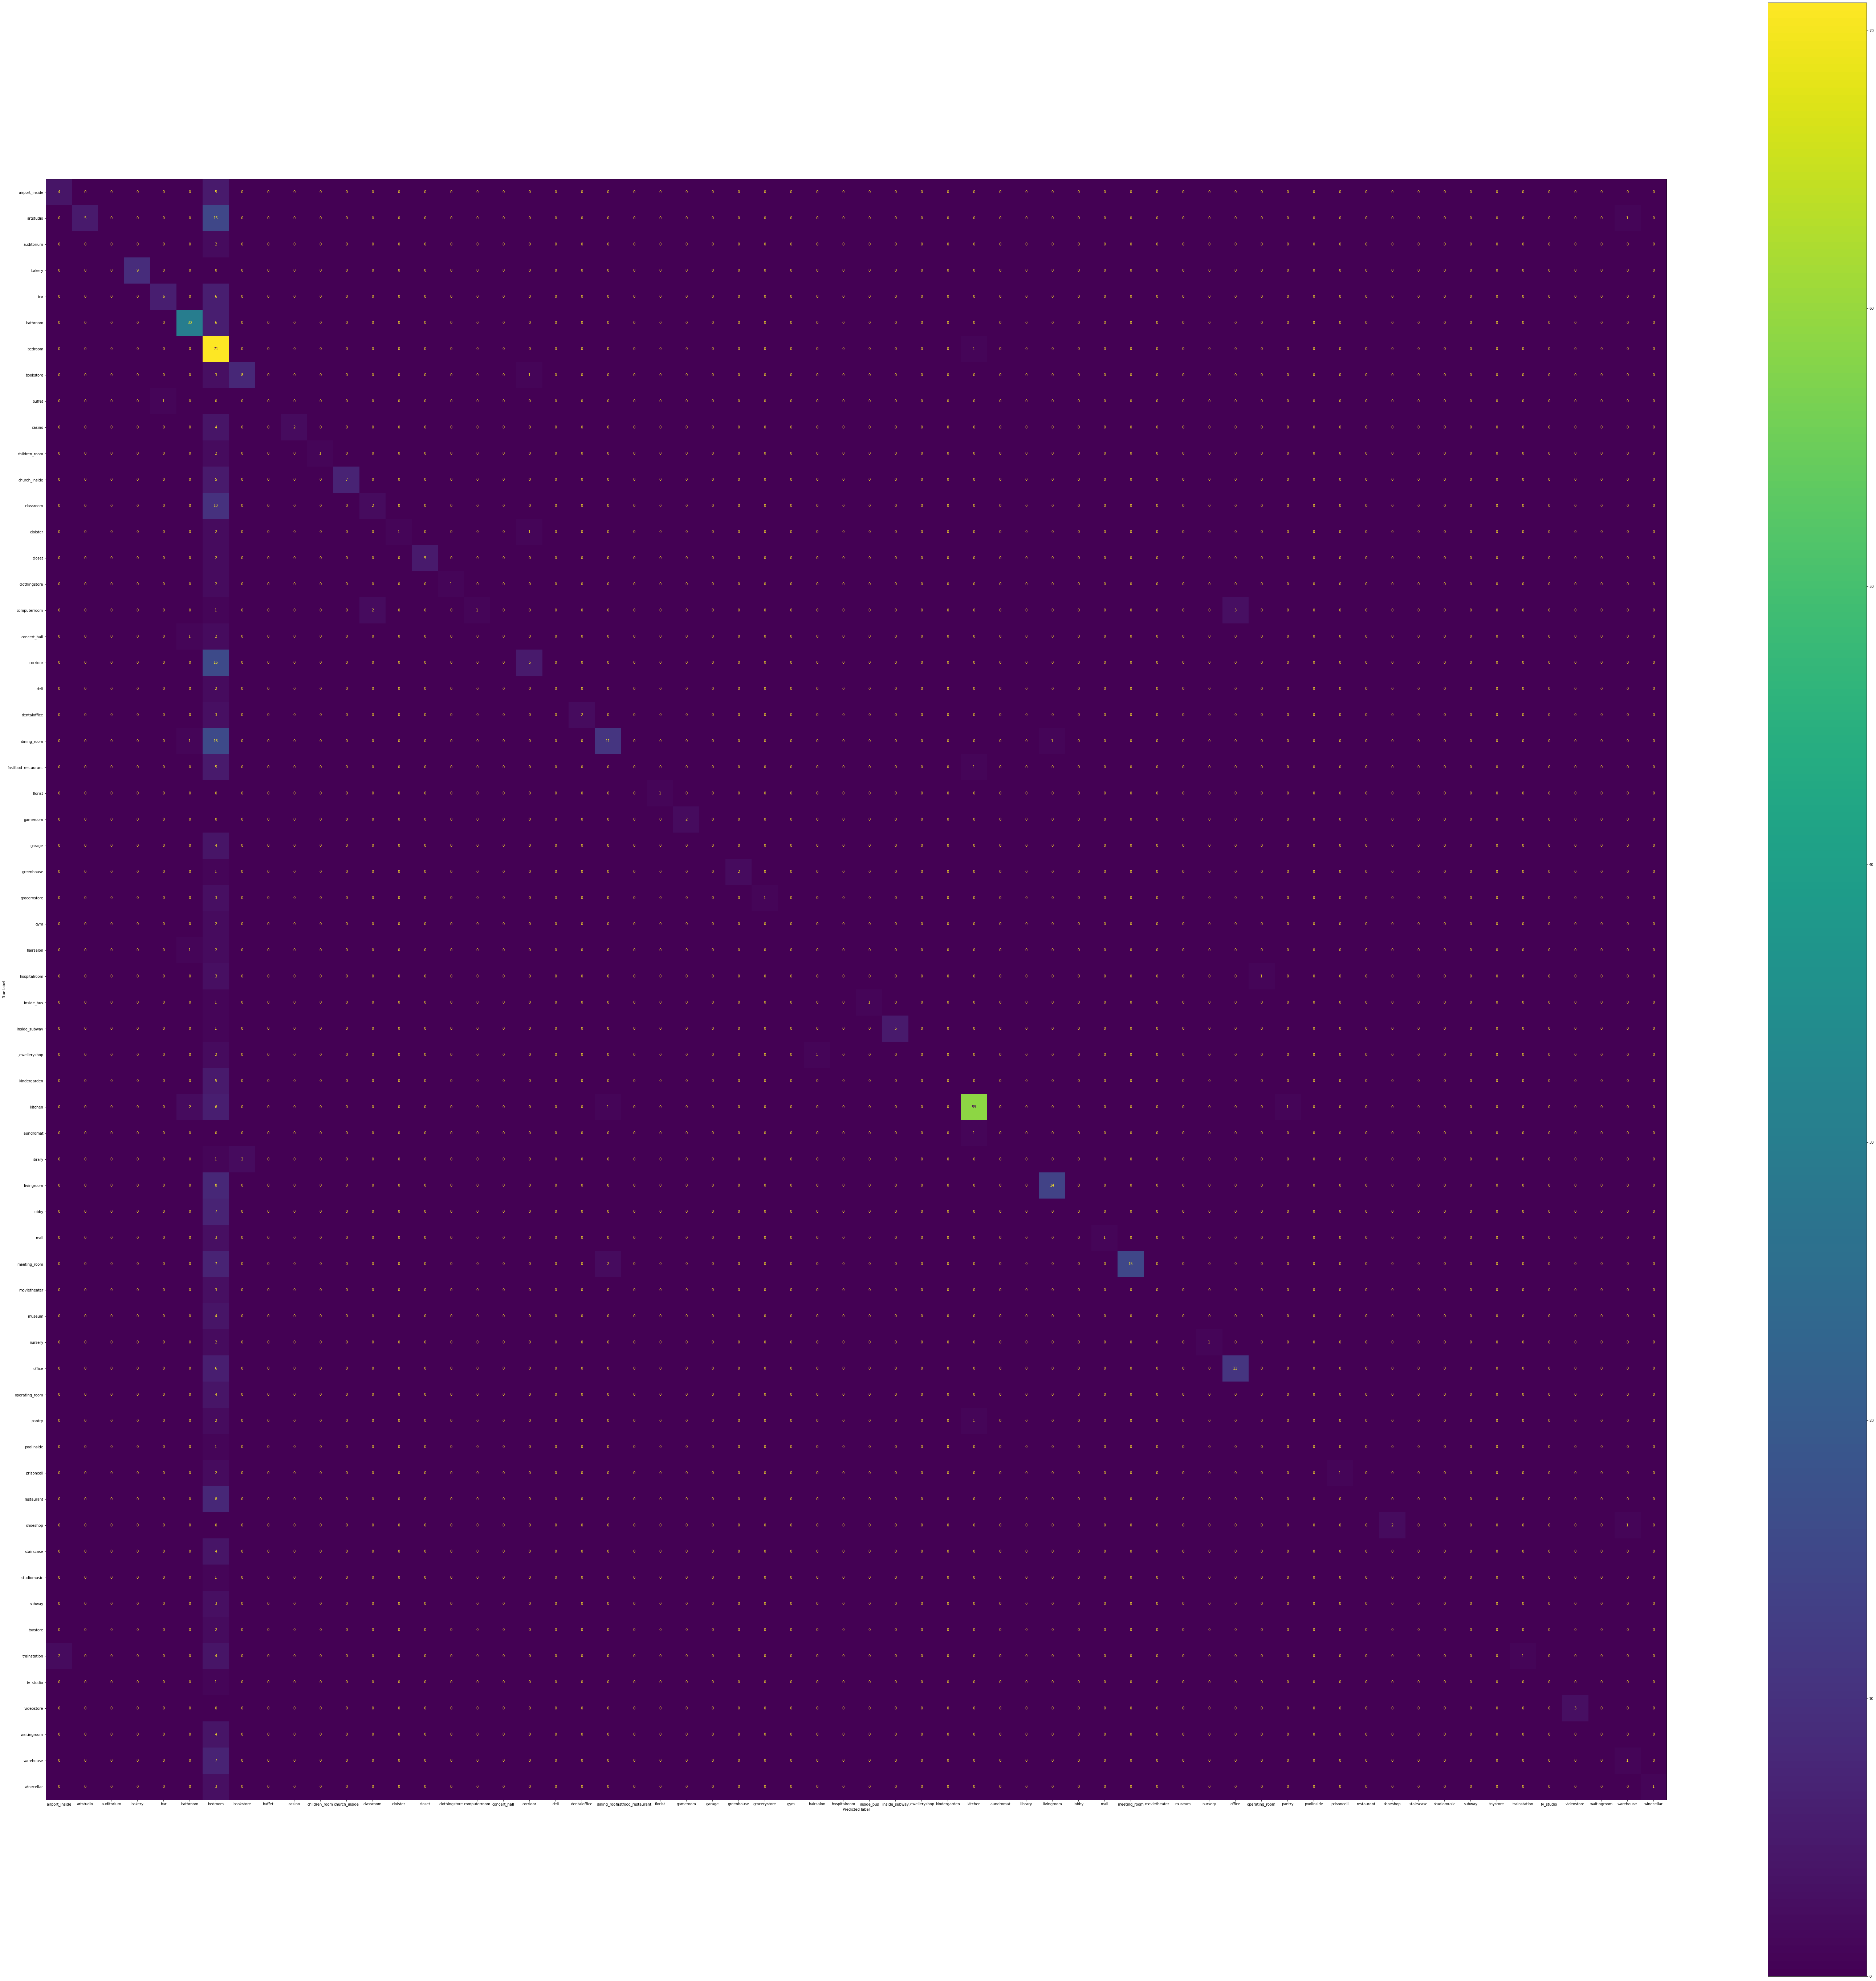

In [ ]:
#Setup confusion matrix figure
plt.rcParams['figure.figsize'] = (100,100)

#Plot the accuracy (confusion matrix)
ConfusionMatrixDisplay.from_predictions(Y_val,Y_pred)
plt.show()

Validate the **Adaboost Decision Tree** model:

In [ ]:
#Predicting y for X_val
Y_pred = decision_trees_adaboost.predict(X_val)

#Mean accurarcy on training and test data
print("Score/accuracy on training data: %f" % decision_trees_adaboost.score(X_train, Y_train))
print("Score/accuracy on validation data: %f" % decision_trees_adaboost.score(X_val, Y_val))
print("Score/accuracy on validation data: %f" % decision_trees_adaboost.score(X_val, Y_pred))

#Determine metrics
# 'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives.
# 'macro': Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
print("Accuracy on validation data: %f" % sk.metrics.accuracy_score(Y_val, Y_pred))
print("Balanced accuracy on validation data: %f" % sk.metrics.balanced_accuracy_score(Y_val, Y_pred))
print("Recall score on validation data: %f" % sk.metrics.recall_score(Y_val, Y_pred, average='macro', zero_division=0))
print("Precision score on validation data: %f" % sk.metrics.precision_score(Y_val, Y_pred, average='macro', zero_division=0))
print("F1 score on validation data: %f" % sk.metrics.f1_score(Y_val, Y_pred, average='macro'))

Score/accuracy on training data: 1.000000
Score/accuracy on validation data: 0.986395
Score/accuracy on validation data: 1.000000
Accuracy on validation data: 0.986395
Balanced accuracy on validation data: 0.978829
Recall score on validation data: 0.978829
Precision score on validation data: 0.989362
F1 score on validation data: 0.982993


In [ ]:
#Setup confusion matrix figure
plt.rcParams['figure.figsize'] = (100,100)

#Plot the accuracy (confusion matrix)
ConfusionMatrixDisplay.from_predictions(Y_val,Y_pred)
plt.show()

##Step 5: Results
Show performance results for each model

In [ ]:
#Graph the results for the basic MLP classifier model:


#Graph the results for the modified MLP classifier model:


#Graph the results for the MLP regressor model:



##Step 6: Exporting & Deploying
Save the model as a pickle

In [ ]:
#Save each of the trained models as a .sav
pickle.dump(classifier_mpl, open(MODEL_DIRECTORY_MPL, 'wb'))
pickle.dump(classifier_mpl_mod, open(MODEL_DIRECTORY_MPL_MOD, 'wb'))
pickle.dump(SVM_clf, open(MODEL_DIRECTORY_SVM, 'wb'))
pickle.dump(decision_trees_adaboost, open(MODEL_DIRECTORY_ADA_DT, 'wb'))

#To Load the model later:
# loaded_model = pickle.load(open(MODEL_DIRECTORY, 'rb'))
# result = loaded_model.score(X_test, Y_test)
# print(result)